In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [4]:
import zipfile
import os
import pandas as pd

# Unzip the main file
zip_file_path = "/content/bank+marketing.zip"
extract_path = "/content/"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Now unzip the bank.zip file which is inside the extracted content
bank_zip_path = os.path.join(extract_path, "bank.zip")
bank_extract_path = os.path.join(extract_path, "bank_extracted")

with zipfile.ZipFile(bank_zip_path, 'r') as zip_ref:
    zip_ref.extractall(bank_extract_path)

# Read the desired CSV file from the bank_extracted folder
# Assuming you want to use 'bank.csv'
df = pd.read_csv(os.path.join(bank_extract_path, "bank.csv"), sep=';')
print(df.head())
print(df.info())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #  

In [5]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [6]:
X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']  # 'y' column indicates whether the client subscribed to a term deposit

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [8]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.8806629834254144
              precision    recall  f1-score   support

       False       0.94      0.93      0.93       807
        True       0.45      0.50      0.48        98

    accuracy                           0.88       905
   macro avg       0.70      0.71      0.70       905
weighted avg       0.89      0.88      0.88       905



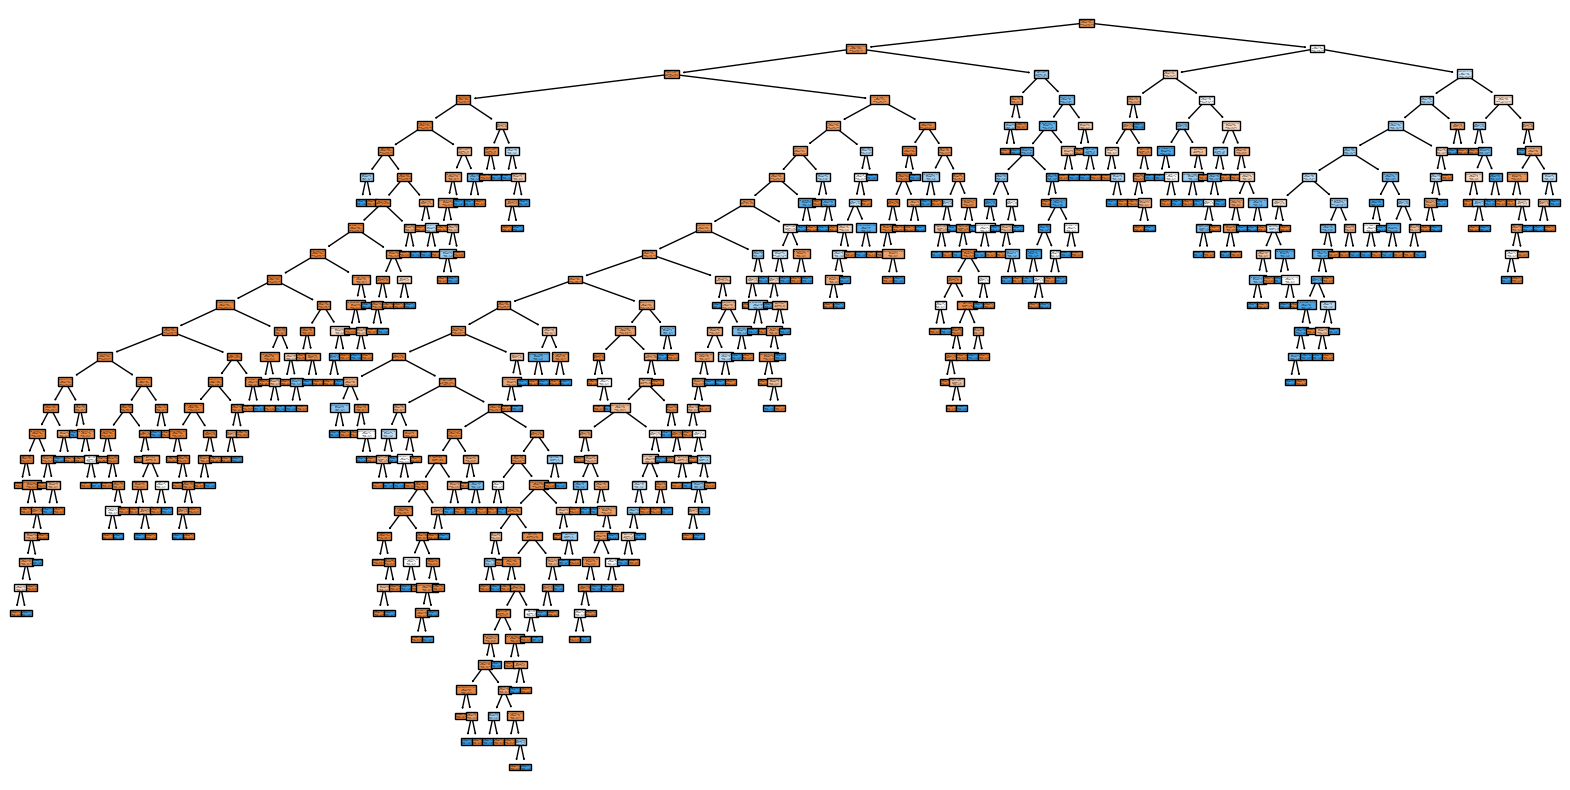

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["No", "Yes"])
plt.show()
